# Submitted by - Simran Joharle , Bhavesh Rajpoot and Sachin Gupta

# Sheet 1

In [25]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
%matplotlib inline

## 1 Principal Component Analysis
### (a)

In [26]:
# TODO: implement PCA (fill in the blanks in the function below)

def pca(data, n_components=None):
    """
    Principal Component Analysis on a p x N data matrix.
    
    Parameters
    ----------
    data : np.ndarray
        Data matrix of shape (p, N).
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray, np.ndarray
        the pca components (shape (n_components, p)) and the projection (shape (n_components, N))

    """
    # set n_components to p by default
    n_components = data.shape[0] if n_components is None else n_components
    assert n_components <= data.shape[0], f"Got n_components larger than dimensionality of data!"
    
    # center the data
    X  = data- data.mean(axis = 1,keepdims=True)  # (p,N) #keepdims takes care of broadcasting

    # compute X times X transpose

    S = X@X.T # (p,N) @ (N,p) = (p,p)

    # compute the eigenvectors and eigenvalues
    # Note: column eigenvect[:,i] is the i'th eigenvector
    eigenval,eigenvect  = np.linalg.eig(S)

    #eigenvectors should be normalised
    print('eigenvect norms:',np.linalg.norm(eigenvect))

    # sort the eigenvectors by eigenvalue and take the n_components largest ones
    arg_sort1 = np.flip(np.argsort(eigenval))  ##this will sort the eigenvalue array and will return the arguments from higher to lower value
    arg_sort = np.argsort(eigenval)[::-1]  ##this will sort the eigenvalue array and will return the arguments from higher to lower value
   
    ##calculating the component matrix 
    componenets = eigenvect[:,arg_sort[:n_components]]

    # compute X_projected, the projection of the data to the components
    X_projected  = componenets.T@X
    
    return componenets.T, X_projected  # return the n_components first components and the pca projection of the data


In [27]:
# Example data to test your implementation 
# All the asserts on the bottom should go through if your implementation is correct

data = np.array([
    [ 1,  0,  0, -1,  0,  0],
    [ 0,  3,  0,  0, -3,  0],
    [ 0,  0,  5,  0,  0, -5]
], dtype=np.float32)

# add a random offset to all samples. it should not affect the results
data += np.random.randn(data.shape[0], 1)

n_components = 2
components, projection = pca(data, n_components=n_components)  # apply your implementation

# the correct results are known (up to some signs)
true_components = np.array([[0, 0, 1], [0, 1, 0]], dtype=np.float32)
true_projection = np.array([
    [ 0,  0,  5,  0,  0, -5],
    [ 0,  3,  0,  0, -3,  0]
], dtype=np.float32)

# check that components match, up to sign
assert isinstance(components, np.ndarray), f'Expected components to be numpy array but got {type(components)}'
assert components.shape == true_components.shape, f'{components.shape}!={true_components.shape}'
assert np.allclose(np.abs(components * true_components).sum(1), np.ones(n_components)), f'Components not matching'

# check that projections agree, taking into account potentially flipped components
assert isinstance(projection, np.ndarray), f'Expected projection to be numpy array but got {type(projection)}'
assert projection.shape == (n_components, data.shape[1]), f'Incorrect shape of projection: Expected {(n_components, data.shape[1])}, got {projection.shape}'
assert np.allclose(projection, true_projection * (components * true_components).sum(1, keepdims=True), atol=1e-6), f'Projections not matching'

print('Test successful!')

eigenvect norms: 1.7320508
Test successful!


### (b)

Load the data (it is a subset of the data at https://opendata.cern.ch/record/4910#)

In [28]:
features = np.load('data/dijet_features.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

print(f'{features.shape=}, {labels.shape=}')  # print the shapes

# TODO: print how many samples of each class are present in the data (hint: numpy.unique)


##lets try to find how classes are represented numerically:

l, counts =  np.unique(labels,return_counts  = True)  ##return counts return the frequency of each class
for label,count in zip(l,counts):
    print(f'Label {int(label)}:{count} samples')

features.max(1) - features.min(1) #shows why normalizing is so imp because the orders of magintudes is very very sparse

features.shape=(116, 2233), labels.shape=(2233,)
Label 0:999 samples
Label 1:864 samples
Label 2:370 samples


array([4.70550879e-01, 6.24100000e-01, 2.85444759e+02, 2.07023039e+04,
       2.85444759e+02, 2.17082442e-02, 2.57673011e+06, 2.31221818e+05,
       2.57360415e+06, 1.93730565e+05, 2.84857209e+05, 2.57677261e+06,
       1.84204173e+05, 1.84204173e+05, 3.36600000e-01, 7.62400000e-01,
       2.81485100e+02, 5.31430064e-01, 7.46280705e-01, 2.81480442e+02,
       3.01087571e+01, 1.99783294e+02, 2.81485100e+02, 5.32966955e-02,
       2.36788894e+05, 2.05753281e+05, 2.58768411e+05, 2.41135522e+06,
       2.40912856e+06, 2.89776967e+00, 6.28146046e+00, 1.65863717e+04,
       1.65863717e+04, 2.39552470e+05, 8.99835177e-01, 8.31025627e-01,
       2.50000000e+01, 1.61026182e+04, 3.36600000e-01, 7.62400000e-01,
       2.81485100e+02, 1.48710566e+00, 1.05698932e+05, 1.12901700e+05,
       1.56688260e+05, 2.29353537e+06, 2.29421585e+06, 5.87578564e+00,
       6.28184636e+00, 1.98779092e+04, 9.75980707e+04, 2.40918456e+06,
       2.89776967e+00, 6.28146046e+00, 1.65863717e+04, 1.65863717e+04,
      

### We have three classes (Numerically represnted as 0,1,2) with followinig counts -
- Class 0 ('b') = 999
- Class 1 ('c') = 864 
- Class 2 ('q') = 370 


Normalize the data

In [29]:
# TODO: subtract the mean of each feature to center the data

## calculting mean of each fetures ie taking mean along the axis and subtracting it from the fetures using keepdims=True

features_centered = features- np.mean(features,axis = 1,keepdims=True)

# TODO: divide by the standard deviation of each feature to normalize the variance

std_vector = np.std(features_centered,axis  = 1).reshape(features.shape[0],1)  ##calculating fetures std deviation and  converting it to a column vector

features_normalize = features_centered/std_vector

### (c)
Compute a 2D PCA projection and make a scatterplot of the result, once without color, once coloring the dots by label

In [30]:
# TODO: apply PCA as implemented in (a)

W,projected_featurs = pca(features_normalize,2)    ###getting the projected features in 2D

eigenvect norms: 10.770329614268968


/Users/bhavesh/opt/anaconda3/envs/mlph/lib/python3.10/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


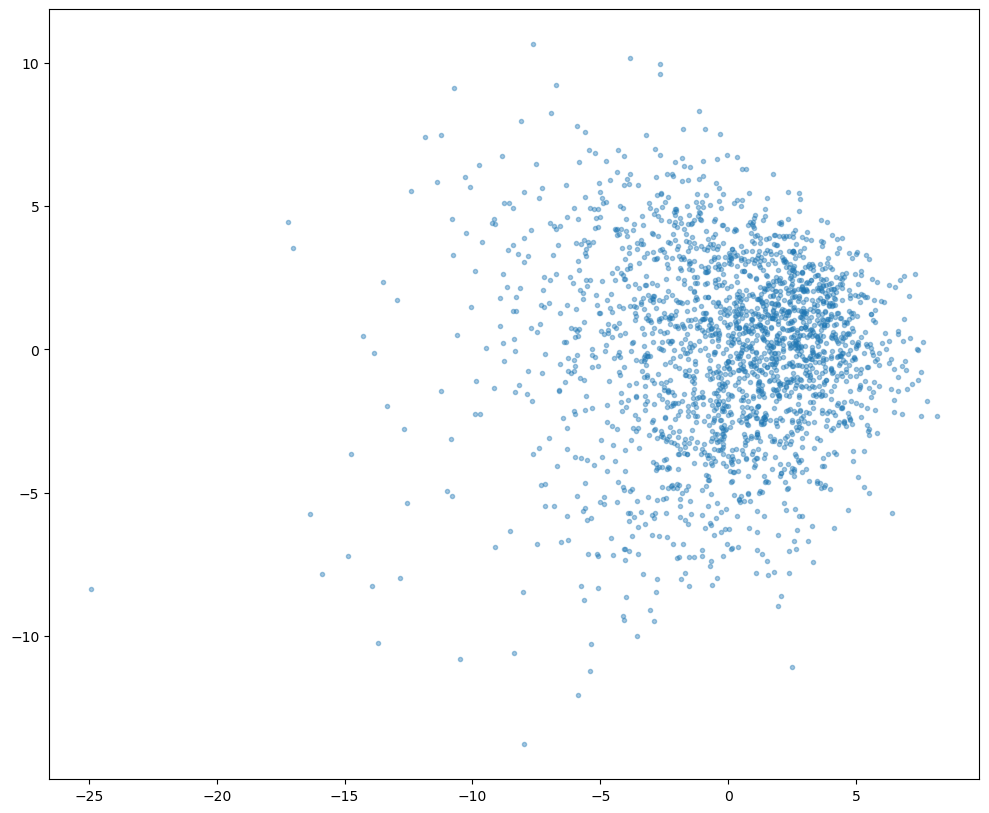

In [31]:
# TODO: make a scatterplot of the PCA projection\
plt.figure(figsize= (12,10))  ##initializing figure in matplotlib
plt.scatter(projected_featurs[0,:],projected_featurs[1,:],marker='.',alpha=0.4)
# plt.set_aspect(1)
# plt.xlabel('')
# plt.ylabel()
plt.show()

### Clearly we can see from the plot that clusters are not distinct.

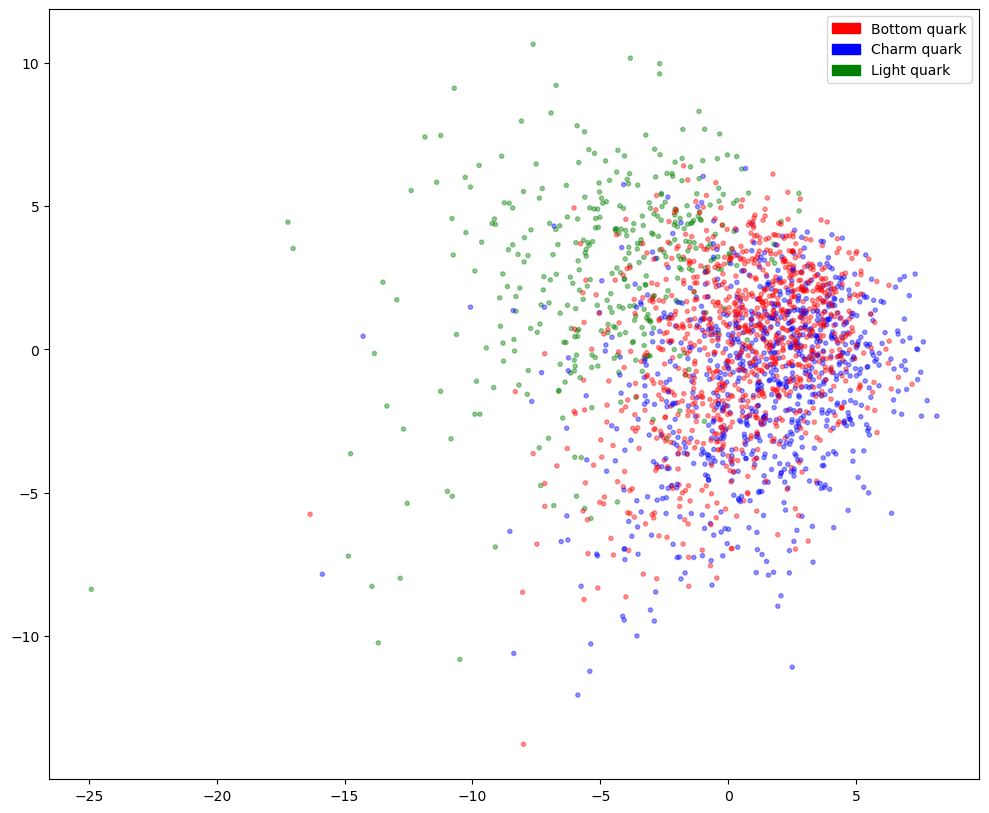

In [32]:
# TODO: make a scatterplot, coloring the dots by their label and including a legend with the label names


# (hint: one way is to call plt.scatter once for each of the three possible labels)\


c = ['r','b','g']   ##Three colors for three quarks , red for b quark, blue for c quark, green for light quark
color_arr = []   ## this array will store color value for each colors

plt.figure(figsize= (12,10))  ##initializing figure in matplotlib

for i in labels:
    color_arr.append(c[int(i)])   ##appending list

plt.scatter(projected_featurs[0,:],projected_featurs[1,:],c = color_arr,marker='.',alpha=0.4)   ##plotting the data

###adding legends according to the colors
import matplotlib.patches as mpatches  
red_patch = mpatches.Patch(color='red', label='Bottom quark')
blue_patch = mpatches.Patch(color='blue', label='Charm quark')
green_patch = mpatches.Patch(color='green', label='Light quark')

plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.show()

we can see that the red(bottom quark) and blue(charm quark) clustered are more overlapped. However all clusters are still not separeted.

## 2 Nonlinear Dimension Reduction

In [33]:
import umap  # import umap-learn, see https://umap-learn.readthedocs.io/

In [34]:
# if you have not done 1(b) yet, you can load the normalized features directly:
features = np.load('data/dijet_features_normalized.npy')
labels = np.load('data/dijet_labels.npy')
label_names = ['b', 'c', 'q']  # bottom, charm or light quarks

### (a)

In [35]:
# TODO: Apply umap on the normalized jet features from excercise 1. It will take a couple of seconds.
# note: umap uses a different convention regarding the feature- and sample dimension, N x p instead of p x N!
reducer = umap.UMAP()

embedding = reducer.fit_transform(features_normalize.T)
# embedding = reducer.fit_transform(features_normalize.T).T
embedding.shape

(2233, 2)

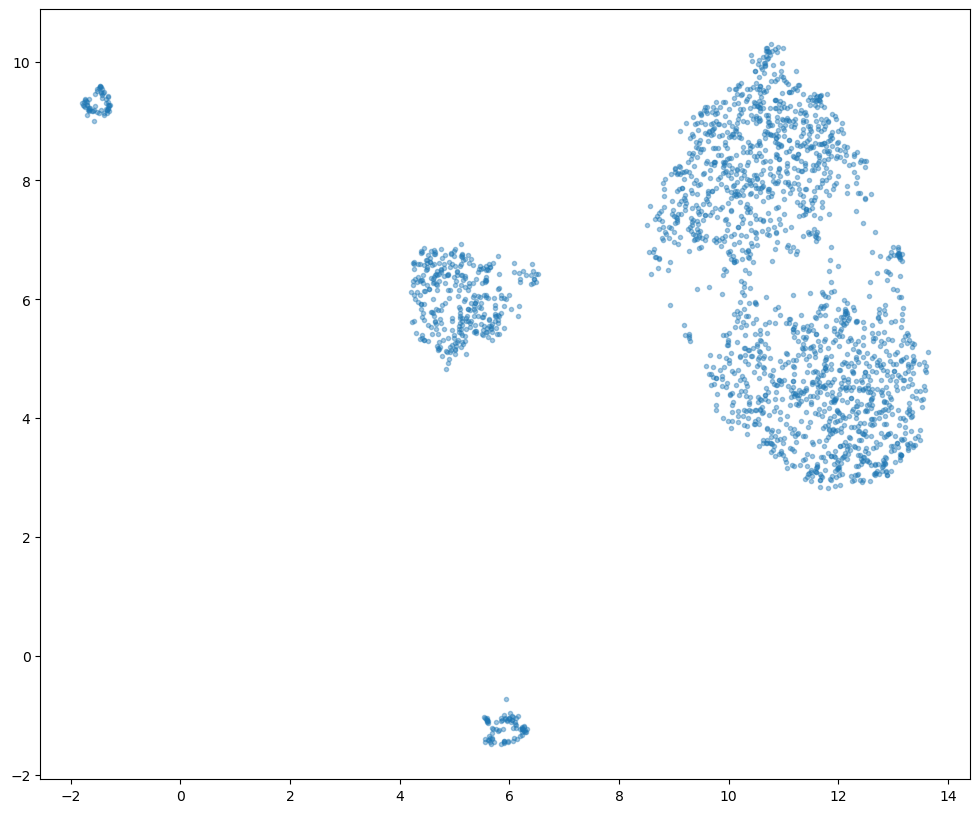

In [36]:
# TODO: make a scatterplot of the UMAP projection

plt.figure(figsize= (12,10))  ##initializing figure in matplotlib
plt.scatter(embedding[:,0],embedding[:,1],marker='.',alpha=0.4)
plt.show()

we can see the data has been separated into five different clusters.

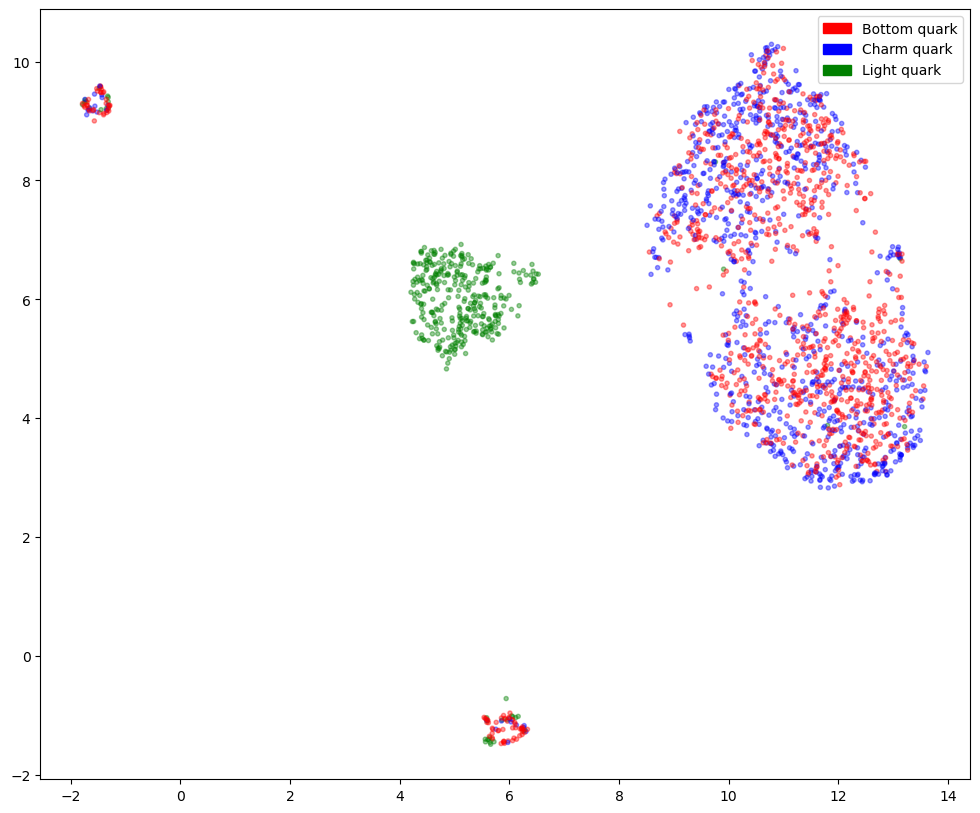

In [37]:
# TODO: make a scatterplot, coloring the dots by their label and including a legend with the label names
# (hint: one way is to call plt.scatter once for each of the three possible labels)

plt.figure(figsize= (12,10))  ##initializing figure in matplotlib

plt.scatter(embedding[:,0],embedding[:,1],c = color_arr,marker='.',alpha=0.4)   ##plotting the data

###adding legends according to the colors
import matplotlib.patches as mpatches  
red_patch = mpatches.Patch(color='red', label='Bottom quark')
blue_patch = mpatches.Patch(color='blue', label='Charm quark')
green_patch = mpatches.Patch(color='green', label='Light quark')

plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.show()


Clearly we see that light quark's cluster is well separated from the others.The bottom and charms quark's data is still overlapped but has been separated into four different clusters.

#Tutor remarks:
Reason for structure in the big cluster: all the samples are di-jets. Jets contains particle and anti-particle. So, that structure might be due to the jets.

### (b)

/Users/bhavesh/opt/anaconda3/envs/mlph/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:374: UserWarning: Exited at iteration 1424 with accuracies 
[4.89167454e-15 3.35065293e-06 1.12126575e-05 9.05349774e-06]
not reaching the requested tolerance 1e-05.
  _, diffusion_map = lobpcg(
/Users/bhavesh/opt/anaconda3/envs/mlph/lib/python3.10/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


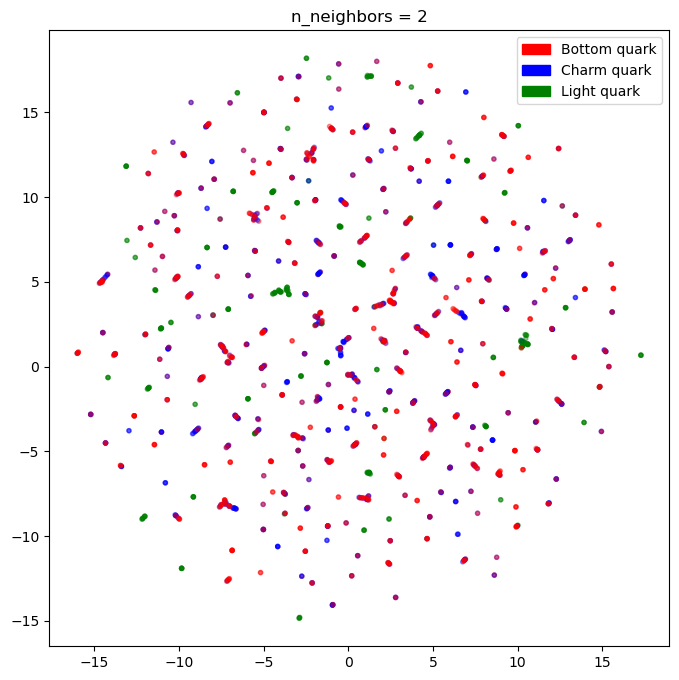

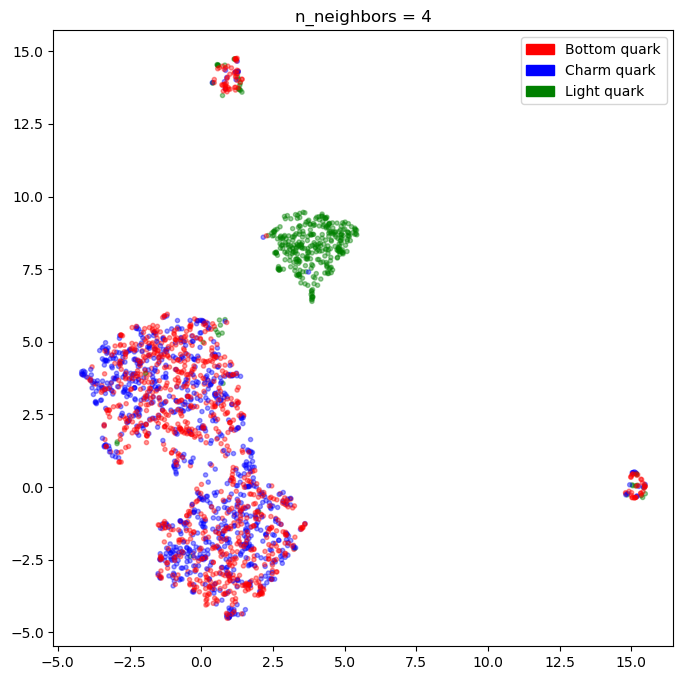

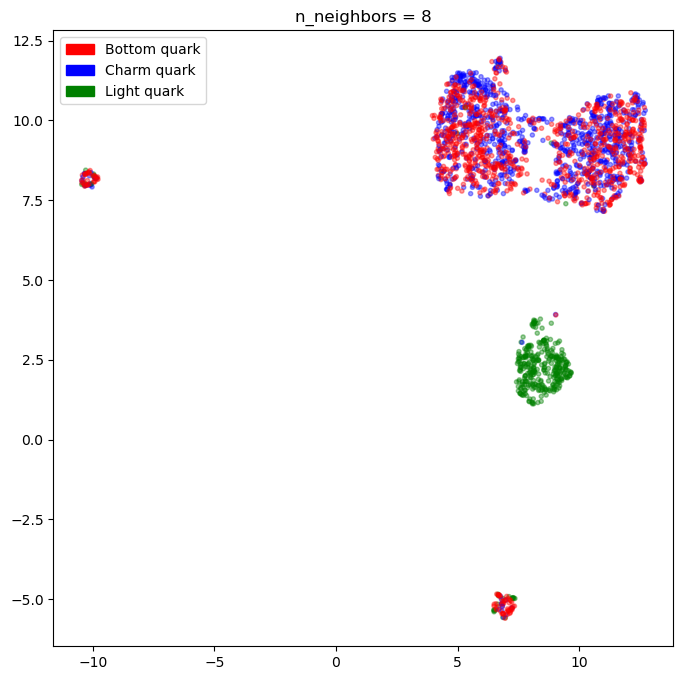

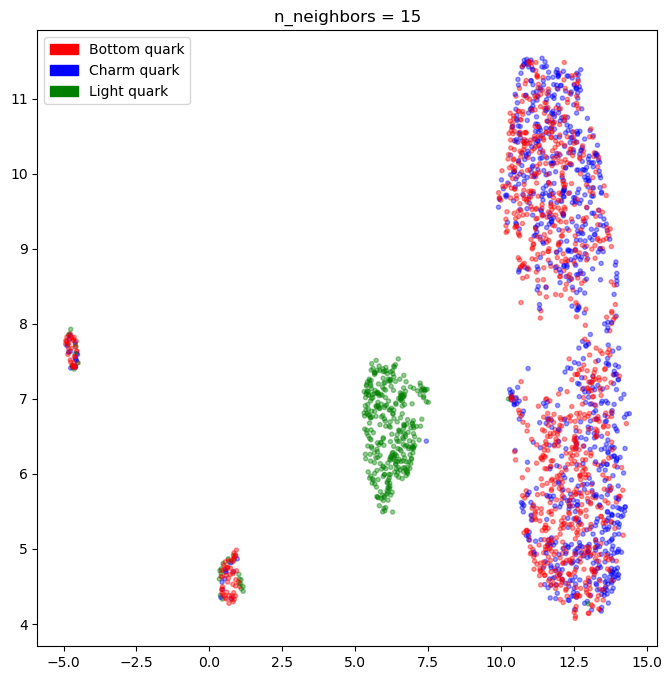

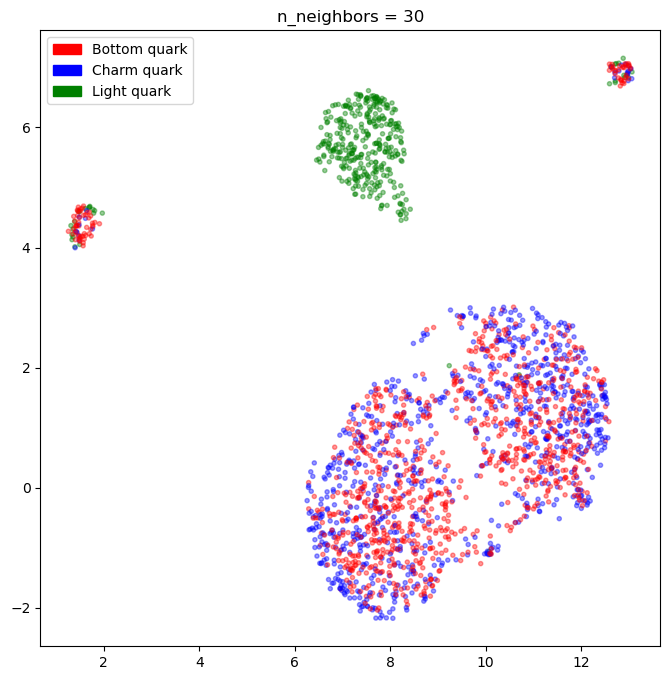

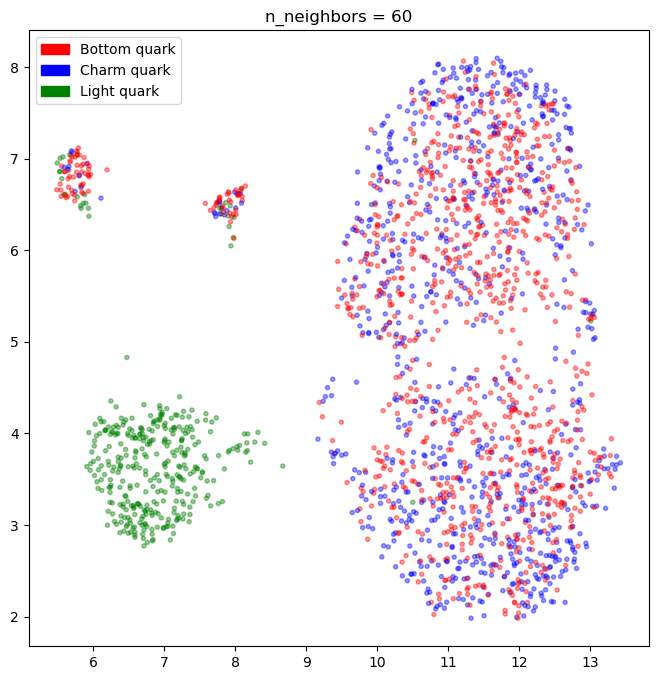

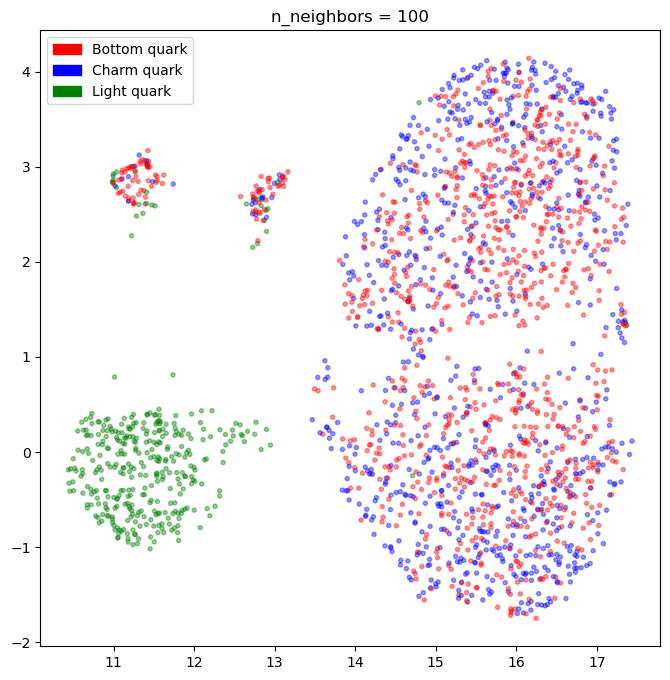

In [38]:
for n_neighbors in (2, 4, 8, 15, 30, 60, 100):
    # TODO: repeat the above, varying the n_neighbors parameter of UMAP
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    
    embedding = reducer.fit_transform(features_normalize.T)
    plt.figure(figsize= (8,8))  ##initializing figure in matplotlib
    plt.title("n_neighbors = "+str(n_neighbors))
    plt.scatter(embedding[:,0],embedding[:,1],c = color_arr,marker='.',alpha=0.4)   ##plotting the data

    ###adding legends according to the colors
    import matplotlib.patches as mpatches  
    red_patch = mpatches.Patch(color='red', label='Bottom quark')
    blue_patch = mpatches.Patch(color='blue', label='Charm quark')
    green_patch = mpatches.Patch(color='green', label='Light quark')

    plt.legend(handles=[red_patch,blue_patch,green_patch])
    plt.show()

We can see that when the number of nearest neighbours is 2, the algorithm is not able to distinguish the clusters(forming small spurious clusters) but as we increase the number of neighbours, algorithm starts capturing the correlation of every single data points with more neighbouring data and we see separation among the clusters(liht quark well separated).However as the number of neighbours increasses beyond a certain limit the algorithm is slightly overshooting and this is leading to the addition of noise $||d_i - d_j||^2$

### (c)

eigenvect norms: 10.770329614268968


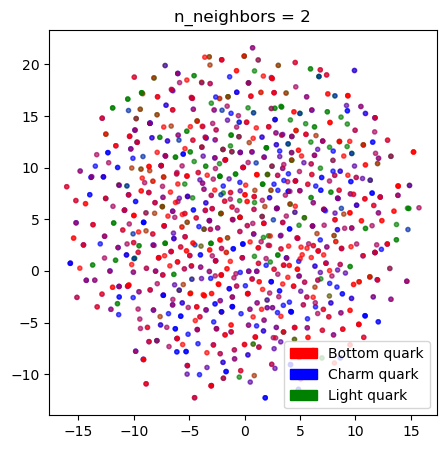

eigenvect norms: 10.770329614268968


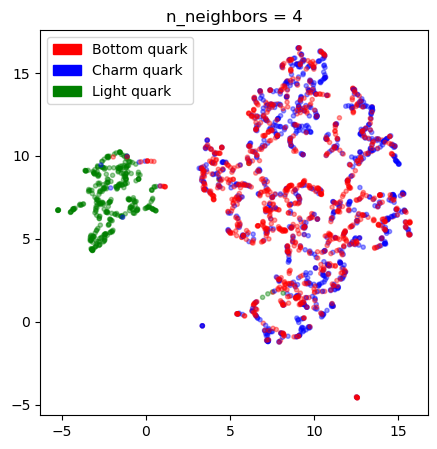

eigenvect norms: 10.770329614268968


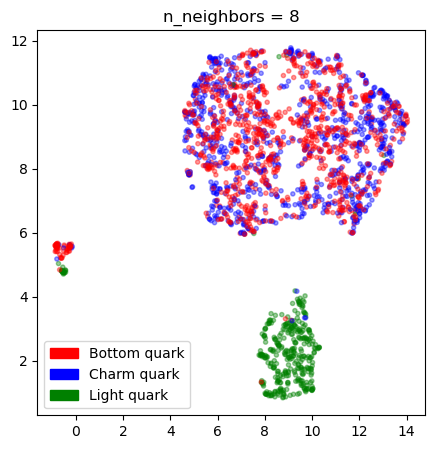

eigenvect norms: 10.770329614268968


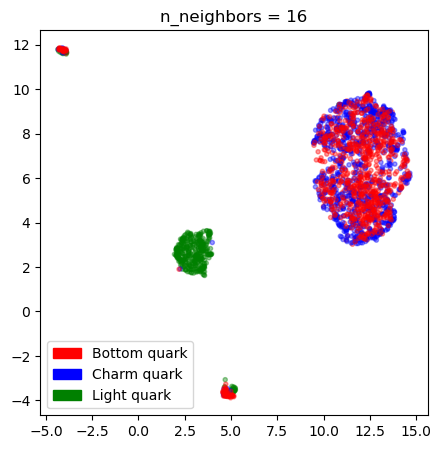

eigenvect norms: 10.770329614268968


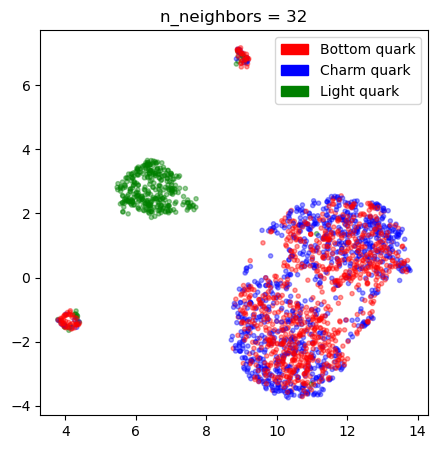

eigenvect norms: 10.770329614268968


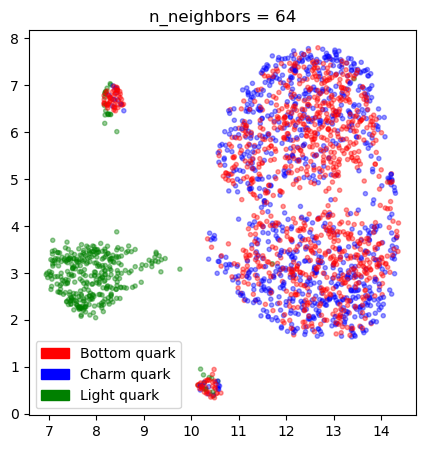

eigenvect norms: 10.770329614268968


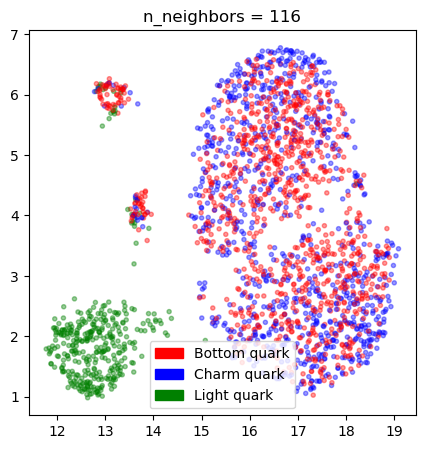

In [39]:
import umap
for n_components in (2, 4, 8, 16, 32, 64, len(features)):
    # TODO: project to the n-components first principal components 
    #       (use your implementation from ex. 1 or PCA from scikit-learn)


    W,projected_featurs = pca(features_normalize,n_components)

    projected_featurs = np.real(projected_featurs)
    
    # TODO: apply UMAP to get from n_components to just two dimensions
    reducer = umap.UMAP(n_neighbors=n_components)
    embedding = reducer.fit_transform(projected_featurs.T)
    plt.figure(figsize= (5,5))  ##initializing figure in matplotlib
    plt.title("n_neighbors = "+str(n_components))
    plt.scatter(embedding[:,0],embedding[:,1],c = color_arr,marker='.',alpha=0.4)   ##plotting the data

    ###adding legends according to the colors
    import matplotlib.patches as mpatches  
    red_patch = mpatches.Patch(color='red', label='Bottom quark')
    blue_patch = mpatches.Patch(color='blue', label='Charm quark')
    green_patch = mpatches.Patch(color='green', label='Light quark')

    plt.legend(handles=[red_patch,blue_patch,green_patch])
    plt.show()


    # TODO: again, make scatterplots as before

If get Imaginary No.s in PCA: use `np.linalg.eigh`

# <center> Bonus Excercises </center>

## <center> First PCA Distribution </center>

100%|██████████| 10000/10000 [00:11<00:00, 853.88it/s]


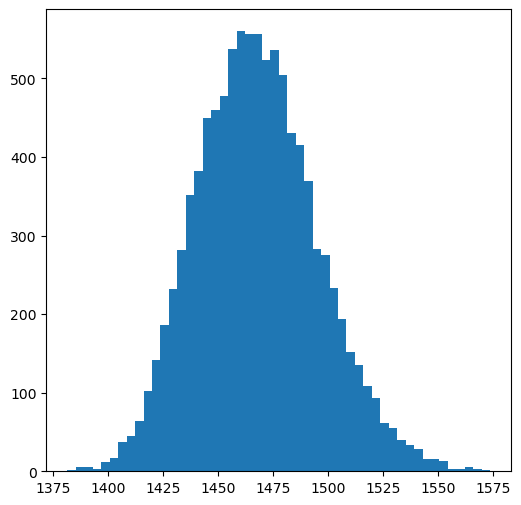

In [40]:
iter = 10000  ##no of sampling of first pca

p = 50  ##nnumber of features
N = 1000  ##number of data points

from tqdm import tqdm  ##this libraray meaures the speed of the loop 


# TODO: implement PCA (fill in the blanks in the function below)

def pca2(data,n_comp):  
    """
   
    we are creating new functions because we only need to sample the eigenvalues and we do not 
    need to do recentering because the all datapoints are sampled from gaussian with mean zero :)  
    
    returns - first n maximum eigenvalues
    """


    # data  = data- np.mean(data,axis = 1,keepdims=True)
    S = data@data.transpose()

    # compute the eigenvectors and eigenvalues
    eigenval,eigenvect  = np.linalg.eig(S)

    eigen_vals = np.sort(eigenval)[::-1]  ##sorting eigenvalu in descending order
   
    return eigen_vals[:n_comp]  ##returning  first largest n_comp eigenvalues


pca_arr = []  ##empty array to store the max  first PCA


for i in tqdm(range(iter)):
    Y = np.random.normal(0,1,(p,N))  ##creating random gaussian matrix N(0,1)
      
    pca_arr.append(pca2(Y,1)[0] ) ##calling the function and appending the list 


plt.figure(figsize = (6,6))
plt.hist(pca_arr,bins = 50)    

plt.show()
    

# calculate UMAP projection from PCA with different no. of components
# that willl show umap artifacts


## <center > Distribution for other PCA's  </center>

In the cell below we will get first $d$ largest eigenvalues and stack them vertically. 

100%|██████████| 5000/5000 [00:00<00:00, 5201.71it/s]


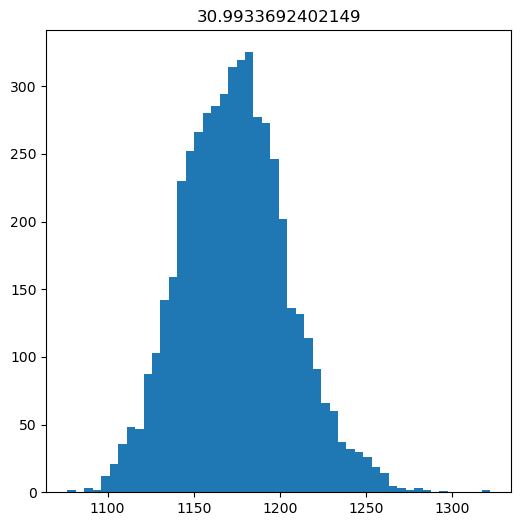

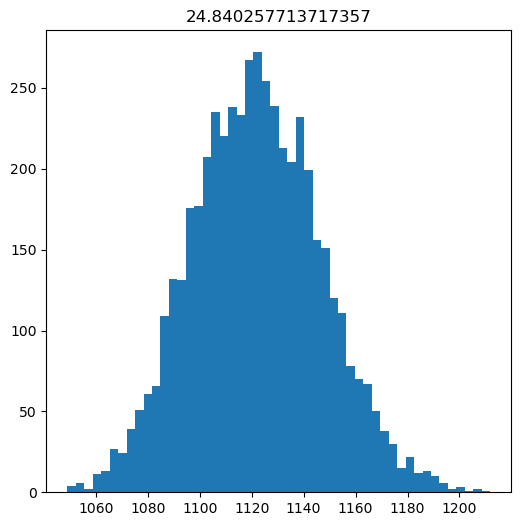

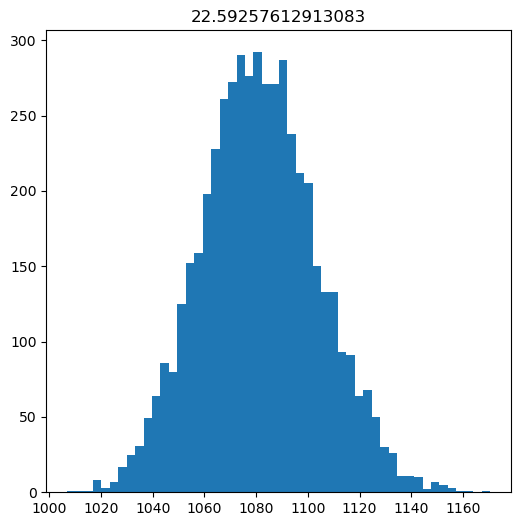

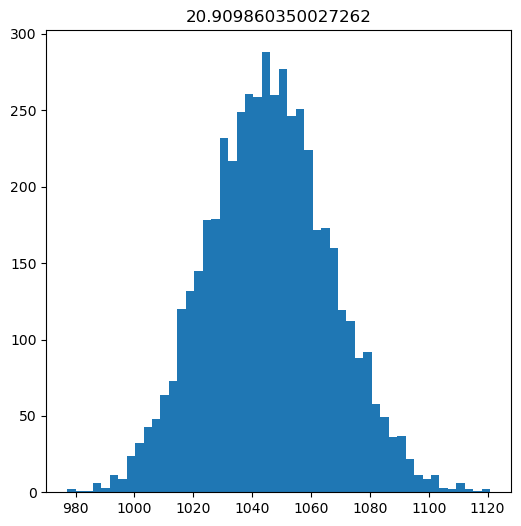

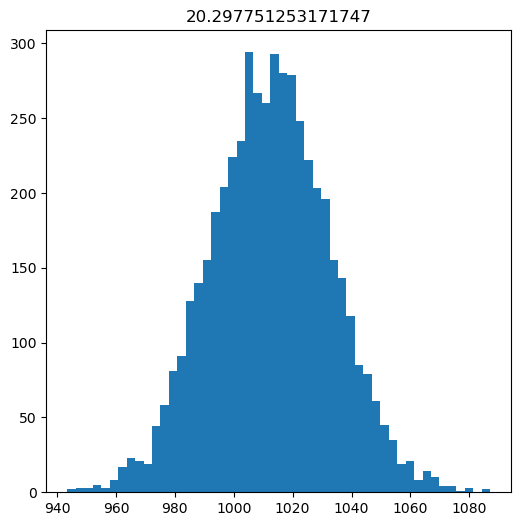

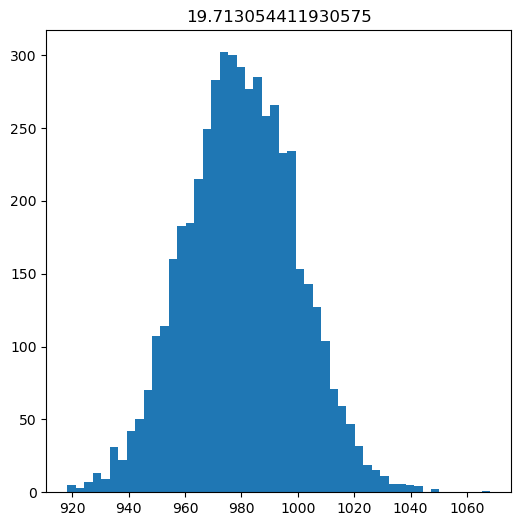

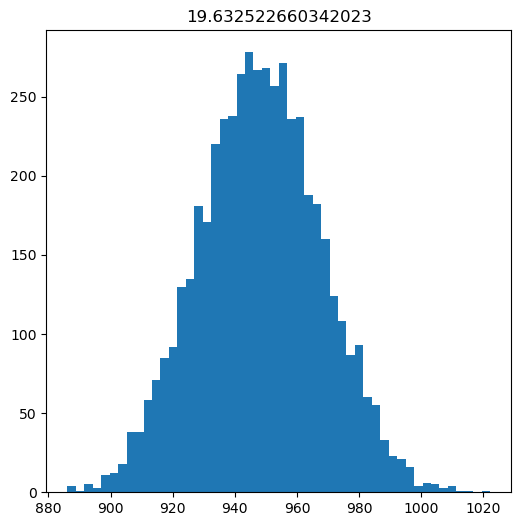

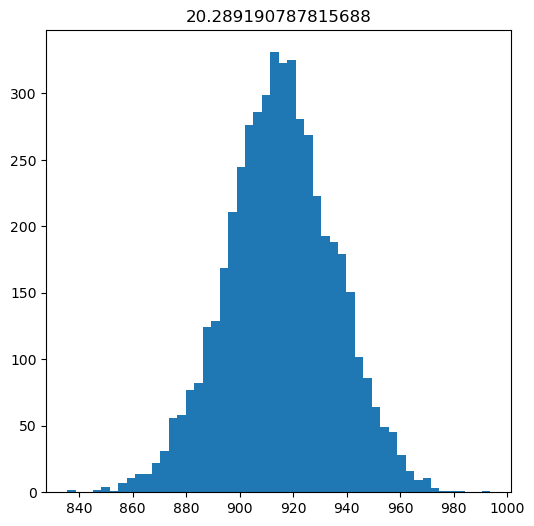

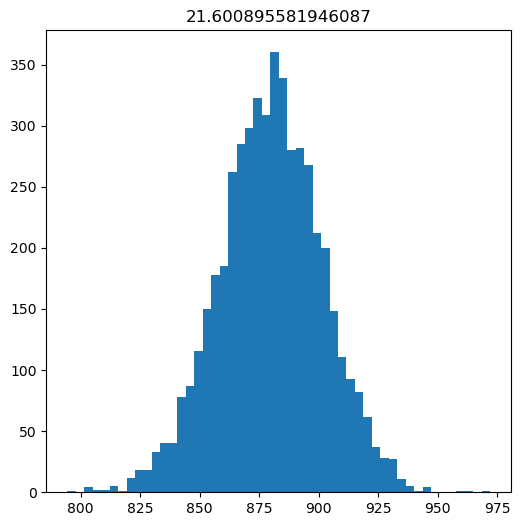

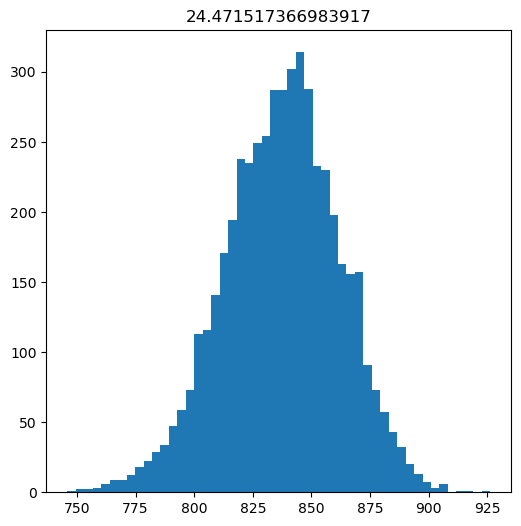

In [43]:
iter = 5000

p = 10 ## i do not want to kill my laptop :)
N = 1000

d = p
pca_array = np.ones((1,d))  

for i in tqdm(range(iter)):
    Y = np.random.normal(0,1,(p,N))
    pca1 = pca2(Y,d).reshape(1,d) 
    pca_array = np.vstack((pca_array,pca1))


pca_array = np.delete(pca_array,0,0)
for i in range(d):
    plt.figure(figsize = (6,6))
    plt.title(str(np.std(pca_array[:,i])))
    plt.hist(pca_array[:,i],label = str(i),bins = 50)
    plt.show()    


The histogram for first PC is a Gaussian and so is for other PCs too. 

# Bonus ques: tutor remarks

Principal comp. is the direction of projection. It is an element of p-dim hypersphere. 

a) Sampling pts from high-dim isotropic Gaussion

    -> Independent sampling components of vector from 1D Gaussian.
    -> prop. dist. of data is rotation-invariant
    -> dist. of pc are rotstion-invariant

b) Projection doesn't looose any info. 

c) They diverge if the no. of dims gets to infinity.

### Laplacian embedding

This method finds points which are spread out. 

Langrange multiplier is used to get new objective. The solution is a saddle point. Fixing the $\lambda$ from the solution gives the problem:

Saddle of saddle point goes away.